In [6]:
!pip install SpeechRecognition

  Using cached speechrecognition-3.14.2-py3-none-any.whl.metadata (30 kB)
   ---------------------------------------- 0.0/32.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/32.9 MB ? eta -:--:--
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.5/32.9 MB 882.6 kB/s eta 0:00:37
    --------------------------------------- 0.8/32.9 MB 270.7 kB/s eta 0:01:59
    --------------------------------------- 0.8/32.9 MB 270.7 kB/s eta 0:01

In [1]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature = 0,
    groq_api_key = "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",
    model_name = "llama-3.3-70b-versatile"
)
result = llm.invoke("Who is Jesus")
print(result.content)


Jesus, also known as Jesus of Nazareth or Jesus Christ, is a central figure in Christianity and is considered by Christians to be the son of God and the savior of humanity. He is believed to have lived in ancient Israel around 2,000 years ago and is considered one of the most influential people in human history.

According to the New Testament of the Bible, Jesus was born in Bethlehem to a Jewish family, and his birth is seen as a fulfillment of Old Testament prophecies. He grew up in Nazareth and began his public ministry around the age of 30, preaching a message of love, forgiveness, and redemption.

Jesus' teachings emphasized the importance of loving God and loving one's neighbors, and he performed many miracles and healings during his ministry. He also gathered a group of disciples, including Peter, John, and Matthew, who followed him and learned from him.

The core of Jesus' message is often summarized as the "Good News" or the "Gospel," which includes the following key points:



In [2]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os

def initialize_llm():
  llm = ChatGroq(
    temperature = 0,
    groq_api_key = "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",
    model_name = "llama-3.3-70b-versatile"
)
  return llm

def create_vector_db():
  loader = DirectoryLoader("data", glob = '*.pdf', loader_cls = PyPDFLoader)
  documents = loader.load()
  text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 50)
  texts = text_splitter.split_documents(documents)
  embeddings = HuggingFaceBgeEmbeddings(model_name = 'sentence-transformers/all-MiniLM-L6-v2')
  vector_db = Chroma.from_documents(texts, embeddings, persist_directory = './chroma_db')
  vector_db.persist()

  print("ChromaDB created and data saved")

  return vector_db

def setup_qa_chain(vector_db, llm):
  retriever = vector_db.as_retriever()
  prompt_templates = """ You are a compassionate mental health chatbot. Respond thoughtfully to the following question:
    {context}
    User: {question}
    Chatbot: """
  PROMPT = PromptTemplate(template = prompt_templates, input_variables = ['context', 'question'])

  qa_chain = RetrievalQA.from_chain_type(
      llm = llm,
      chain_type = "stuff",
      retriever = retriever,
      chain_type_kwargs = {"prompt": PROMPT}
  )
  return qa_chain


def main():
  print("Intializing Chatbot.........")
  llm = initialize_llm()

  db_path = "/content/chroma_db"

  if not os.path.exists(db_path):
    vector_db  = create_vector_db()
  else:
    embeddings = HuggingFaceBgeEmbeddings(model_name = 'sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)
  qa_chain = setup_qa_chain(vector_db, llm)

  while True:
    query = input("\nHuman: ")
    if query.lower()  == "exit":
      print("Chatbot: Take Care of yourself, Goodbye!")
      break
    response = qa_chain.run(query)
    print(f"Chatbot: {response}")

if __name__ == "__main__":
  main()

Intializing Chatbot.........


C:\Users\agile\AppData\Local\Temp\ipykernel_34336\481950940.py:22: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(model_name = 'sentence-transformers/all-MiniLM-L6-v2')
C:\Users\agile\AppData\Local\Temp\ipykernel_34336\481950940.py:24: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vector_db.persist()


ChromaDB created and data saved


C:\Users\agile\AppData\Local\Temp\ipykernel_34336\481950940.py:65: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain.run(query)


Chatbot: Hello. It seems like you've shared a snippet of text related to mental health, specifically about individual interpretations of a good life and a definition of mental health by Rowling et al. (2002). However, it appears to be repeated multiple times. 

If you're looking to discuss the concept of mental health, the importance of individual perspectives on what constitutes a good life, or perhaps the role of nursing in child and adolescent mental health, I'm here to listen and provide support. Please feel free to share your thoughts, questions, or concerns, and I'll do my best to assist you in a compassionate and non-judgmental manner. How can I help you today?
Chatbot: Take Care of yourself, Goodbye!


In [4]:
# Import necessary libraries
from langchain_groq import ChatGroq
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
import gradio as gr

def initialize_llm():
    llm = ChatGroq(
        temperature=0,
        groq_api_key="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",
        model_name="llama-3.3-70b-versatile"
    )
    return llm

def create_vector_db():
    # First make sure the data directory exists
    if not os.path.exists("data"):
        os.makedirs("data")
        print("Created /content/data directory. Please upload your PDF files there.")
        return None

    loader = DirectoryLoader("data", glob='*.pdf', loader_cls=PyPDFLoader)
    documents = loader.load()

    if not documents:
        print("No PDF files found in /content/data/ directory. Please upload some PDF files.")
        return None

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)
    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory='./chroma_db')
    vector_db.persist()

    print("ChromaDB created and data saved")

    return vector_db

def setup_qa_chain(vector_db, llm):
    retriever = vector_db.as_retriever()
    prompt_template = """
    You are a compassionate mental health chatbot. Respond thoughtfully to the following question:

    {context}

    User: {question}

    Chatbot:
    """
    PROMPT = PromptTemplate(template=prompt_template, input_variables=['context', 'question'])

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type="stuff",
        retriever=retriever,
        chain_type_kwargs={"prompt": PROMPT}
    )
    return qa_chain

# Install required packages (for Colab)
try:
    import langchain_groq
except ImportError:
    print("Installing required packages...")
    !pip install langchain langchain-groq langchain-community gradio chromadb sentence-transformers

# Initialize the chatbot
print("Initializing Chatbot...")
llm = initialize_llm()

db_path = "chroma_db"

if not os.path.exists(db_path):
    vector_db = create_vector_db()
    if vector_db is None:
        print("Please upload PDF files to the /content/data/ directory and run this cell again.")
else:
    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

# Only setup the QA chain if vector_db exists
if 'vector_db' in locals() and vector_db is not None:
    qa_chain = setup_qa_chain(vector_db, llm)

    def chatbot_response(user_input, chat_history):
        if not user_input.strip():
            return "Please provide a valid input."

        response = qa_chain.run(user_input)
        return response

    with gr.Blocks(theme='Respair/Shiki@1.2.1') as app:
        gr.Markdown("# Mental Health Chatbot")
        gr.Markdown("Ask any mental health related questions and get compassionate responses.")

        chatbot = gr.ChatInterface(
            fn=chatbot_response,
            title="Mental Health Chatbot",
            examples=["How can I manage anxiety?", "What are signs of depression?", "Techniques for stress relief"]
        )

    app.launch(share=True)
else:
    print("Vector database setup failed. Cannot launch chatbot.")

Initializing Chatbot...


c:\Users\agile\anaconda3\Lib\site-packages\gradio\components\chatbot.py:279: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2025/04/21 15:15:00 [W] [service.go:132] login to server failed: dial tcp 44.237.78.176:7000: i/o timeout


In [3]:
# --- Import necessary libraries ---
from langchain_groq import ChatGroq
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.memory import ConversationBufferMemory
import os
import gradio as gr
import csv
from transformers import pipeline
import speech_recognition as sr

# --- Initialize Sentiment Analyzer ---
sentiment_analyzer = pipeline("sentiment-analysis")

# --- Initialize LLM ---
def initialize_llm():
    try:
        llm = ChatGroq(
            temperature=0,
            groq_api_key="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",
            model_name="llama-3-70b-8192"  # Correct model name
        )
        print("LLM initialized successfully")
        return llm
    except Exception as e:
        print("LLM Initialization Failed:", e)
        raise

# --- Create or Load Vector DB ---
def create_vector_db():
    if not os.path.exists("data"):
        os.makedirs("data")
        print("Created data directory. Please upload your PDF files there.")
        return None

    loader = DirectoryLoader("data/", glob='*.pdf', loader_cls=PyPDFLoader)
    documents = loader.load()

    if not documents:
        print("No PDF files found in /content/data/. Please upload some PDFs.")
        return None

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)
    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory='./chroma_db')
    vector_db.persist()

    print("ChromaDB created and data saved")
    return vector_db

# --- Setup Conversational Chain with Memory ---
def setup_conversational_chain(vector_db, llm):
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
    retriever = vector_db.as_retriever()

    prompt_template = """
    You are a compassionate mental health chatbot. Respond thoughtfully to the following question:

    {context}

    User: {question}

    Chatbot:
    """
    PROMPT = PromptTemplate(template=prompt_template, input_variables=['context', 'question'])

    convo_chain = ConversationalRetrievalChain.from_llm(
        llm=llm,
        retriever=retriever,
        memory=memory,
        combine_docs_chain_kwargs={"prompt": PROMPT},
        verbose=True
    )
    return convo_chain

# --- Feedback Storage ---
def save_feedback(question, response, feedback):
    with open("feedback_log.csv", "a", newline='') as file:
        writer = csv.writer(file)
        writer.writerow([question, response, feedback])

# --- Hybrid QA System ---
def hybrid_qa(query, vector_db, llm):
    try:
        retriever = vector_db.as_retriever()
        docs = retriever.get_relevant_documents(query)
        if docs:
            context = "\n".join([doc.page_content for doc in docs[:2]])
            prompt = f"Use the following context to answer:\n\n{context}\n\nQ: {query}\nA:"
        else:
            prompt = query

        response = llm.invoke(prompt)
        return response.content if hasattr(response, 'content') else response
    except Exception as e:
        print("Hybrid QA Error:", e)
        return "I'm having trouble accessing relevant information right now."

# --- Gradio App Setup ---
print("Initializing Chatbot...")
llm = initialize_llm()

db_path = "chroma_db"

if not os.path.exists(db_path):
    vector_db = create_vector_db()
    if vector_db is None:
        print("Please upload PDF files to the /content/data/ directory and run this cell again.")
else:
    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

# if not os.path.exists(db_path):
#     vector_db = create_vector_db()
#     if vector_db is None:
#         raise Exception("Upload PDF files to /content/data/ and re-run.")
# else:
#     embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
#     vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

if 'vector_db' in locals() and vector_db:
    convo_chain = setup_conversational_chain(vector_db, llm)

    # --- Sentiment-aware Chatbot Response ---
    def chatbot_response(user_input, chat_history):
        if not user_input.strip():
            return "Please provide a valid input."

        response = qa_chain.run(user_input)
        return response

    # --- Feedback Handling ---
    def handle_feedback(data: gr.LikeData):
        question = data.message['content']
        response = data.response['content']
        feedback = "👍" if data.liked else "👎"
        save_feedback(question, response, feedback)
    # Rating Feedback Handler (1 to 5)
    def handle_rating_feedback(response, rating):
        if not response:
            return "No chat history available."
        question, response = response[-1]
        save_feedback(question, response, f"⭐ {rating}")
        return "Thank you for your feedback!"

    def save_feedback(question, response, feedback):
        with open("feedback_log.csv", "a", newline='') as file:
            writer = csv.writer(file)
            writer.writerow([question, response, feedback])



    # --- Launch Gradio App ---
    with gr.Blocks(theme='Respair/Shiki@1.2.1') as app:
        gr.Markdown("# 🧠 Mental Health Chatbot")
        gr.Markdown("Ask any mental health-related questions and receive a compassionate response.\n\nYou can also give feedback (👍 or 👎) after every reply.")

        chat_history_state = gr.State([])

        with gr.Tab("💬 Text Chat"):
            chat = gr.ChatInterface(
                fn=chatbot_response,
                type="messages",
                title="Compassionate Chat",
                description="Ask questions and provide feedback after each response.",
                examples=["I feel stressed lately.", "How can I improve my mood?"],
        )

        # Adding the feedback mechanism after every answer
        with gr.Row():
            feedback_rating = gr.Slider(label="Rate the response", minimum=1, maximum=5, step=1)
            submit_button = gr.Button("Submit Feedback")

        # Submit feedback button logic
        submit_button.click(fn=handle_rating_feedback, inputs=[chat, feedback_rating], outputs=[gr.Textbox(value="Thank you for your feedback!")])


        with gr.Tab("🎙️ Voice Input"):
            audio_input = gr.Audio(type="filepath", label="Upload your voice (.wav only)")
            response_output = gr.Textbox(label="Chatbot Response")
            submit_button = gr.Button("Submit Voice")
            
            def voice_input(audio):
                try:
                    recognizer = sr.Recognizer()
                    with sr.AudioFile(audio) as source:
                        audio_data = recognizer.record(source)
                        query = recognizer.recognize_google(audio_data)
                        print(f"Voice input recognized: {query}")
                        result = chatbot_response(query, [])
                        return result
                except Exception as e:
                    print("Voice input error:", e)
                    return "Sorry, I couldn't process your voice input."

            submit_button.click(fn=voice_input, inputs=audio_input, outputs=response_output)

    app.launch(share=True)
else:
    print("Vector database setup failed. Cannot launch chatbot.")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


Initializing Chatbot...
LLM initialized successfully
* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Missing file: c:\Users\agile\anaconda3\Lib\site-packages\gradio\frpc_windows_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.3
3. Move the file to this location: c:\Users\agile\anaconda3\Lib\site-packages\gradio


In [2]:
# --- Import necessary libraries ---
from langchain_groq import ChatGroq
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.memory import ConversationBufferMemory
import os
import gradio as gr
import csv
from transformers import pipeline
import speech_recognition as sr

# --- Initialize LLM ---
def initialize_llm():
    try:
        llm = ChatGroq(
            temperature=0,
            groq_api_key="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",
            model_name="llama3-70b-8192"
        )
        print("✅ LLM initialized successfully")
        return llm
    except Exception as e:
        print("❌ LLM Initialization Failed:", e)
        raise

# --- Create or Load Vector DB ---
def create_vector_db():
    if not os.path.exists("data"):
        os.makedirs("data")
        print("📁 Created data directory. Please upload your PDF files there.")
        return None

    loader = DirectoryLoader("data/", glob='*.pdf', loader_cls=PyPDFLoader)
    documents = loader.load()

    if not documents:
        print("❌ No PDF files found in /data/. Please upload some PDFs.")
        return None

    print(f"📄 Loaded {len(documents)} documents")

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)

    print(f"✂️ Split into {len(texts)} chunks")

    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory='./chroma_db')
    vector_db.persist()

    print("✅ ChromaDB created and persisted")
    return vector_db

# --- Setup Conversational Chain with Memory ---
def setup_conversational_chain(vector_db, llm):
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
    retriever = vector_db.as_retriever()

    prompt_template = """
    You are a compassionate mental health chatbot. Respond thoughtfully to the following question:

    {context}

    User: {question}

    Chatbot:
    """
    PROMPT = PromptTemplate(template=prompt_template, input_variables=['context', 'question'])

    convo_chain = ConversationalRetrievalChain.from_llm(
        llm=llm,
        retriever=retriever,
        memory=memory,
        combine_docs_chain_kwargs={"prompt": PROMPT},
        verbose=True
    )
    return convo_chain

# --- Feedback Storage ---

def save_feedback(question, response, feedback):
    try:
        file_exists = os.path.isfile("feedback_log.csv")
        with open("feedback_log.csv", "a", newline='', encoding='utf-8') as file:
            writer = csv.writer(file)

            # Write headers only if file is new
            if not file_exists:
                writer.writerow(["Question", "Response", "Feedback"])

            # Escape newlines and ensure clean text
            clean_question = question.replace('\n', ' ').strip()
            clean_response = response.replace('\n', ' ').strip()
            clean_feedback = str(feedback).strip()

            writer.writerow(["User-Question :",clean_question])
            writer.writerow(["Chat-bot response :", clean_response])
            writer.writerow(["Feedback and rating :", clean_feedback])
            writer.writerow([])
            writer.writerow([])
        return "✅ Feedback submitted!"
    except Exception as e:
        return f"❌ Error saving feedback: {e}"


# --- Initialize chatbot ---
print("🚀 Initializing Chatbot...")
llm = initialize_llm()

db_path = "chroma_db"
if not os.path.exists(db_path):
    vector_db = create_vector_db()
    if vector_db is None:
        raise Exception("❗ Upload PDF files to /data and re-run.")
else:
    print("📂 Loading existing ChromaDB...")
    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

if 'vector_db' in locals() and vector_db:
    convo_chain = setup_conversational_chain(vector_db, llm)

    # --- Sentiment-aware Chatbot Response with Error Handling ---
    def chatbot_response(user_input, chat_history):
        if not user_input.strip():
            return "⚠️ Please provide a valid input."

        try:
            print(f"🧠 Received query: {user_input}")
            response = convo_chain.run(user_input)
            chatbot_response.last_question = user_input
            chatbot_response.last_response = response
            print(f"🤖 Response: {response}")
            return response
        except Exception as e:
            print(f"❌ Error during response: {e}")
            return "🚫 Sorry, I encountered an error processing your message."

    # --- Rating Feedback Handler ---
    def handle_rating_feedback(rating):
        try:
            question = getattr(chatbot_response, 'last_question', 'N/A')
            response = getattr(chatbot_response, 'last_response', 'N/A')
            return save_feedback(question, response, f"⭐ {rating}")
        except Exception as e:
            return f"❌ Unable to save feedback: {e}"

    # --- Voice Input Handler ---
    def voice_input(audio):
        try:
            recognizer = sr.Recognizer()
            with sr.AudioFile(audio) as source:
                audio_data = recognizer.record(source)
                query = recognizer.recognize_google(audio_data)
                print(f"🎙️ Voice input recognized: {query}")
                result = chatbot_response(query, [])
                return result
        except Exception as e:
            print("❌ Voice input error:", e)
            return "🚫 Sorry, I couldn't process your voice input."

    # --- Launch Gradio App ---
    with gr.Blocks(theme='Respair/Shiki@1.2.1') as app:
        gr.Markdown(
            """
            <div style='text-align: center;'>
                <h1>🧠  Mental Health Chatbot</h1>
                <p style='font-size: 18px;'>Talk openly. Receive compassionate, thoughtful responses.<br>Text or voice input supported.</p>
            </div>
            """
    )
        
        with gr.Tab("💬 Text Chat"):
            with gr.Row():
                with gr.Column(scale=3):
                    gr.Markdown("### 💭 Chat with the bot")
                    chat = gr.ChatInterface(
                        fn=chatbot_response,
                        type="messages",
                        title="Compassionate Chat",
                        description="Ask your mental health questions freely.",
                        examples=["I feel stressed lately.", "How can I improve my mood?"]
                    )
                with gr.Column(scale=1):
                    gr.Markdown("### ⭐ Feedback")
                    feedback_slider = gr.Slider(label="How helpful was the response?", minimum=1, maximum=5, step=1, value=3)
                    feedback_button = gr.Button("Submit Feedback", variant="primary")
                    feedback_output = gr.Textbox(label="Feedback Status", interactive=False)

                    feedback_button.click(fn=handle_rating_feedback, inputs=[feedback_slider], outputs=[feedback_output])

        with gr.Tab("🎙️ Voice Input"):
            gr.Markdown("### 🎧 Upload your voice (WAV format only)")
            with gr.Row():
                audio_input = gr.Audio(type="filepath", label="Your Voice (.wav)")
                voice_submit = gr.Button("🟢 Submit")
            voice_output = gr.Textbox(label="Chatbot Response")

            voice_submit.click(fn=voice_input, inputs=[audio_input], outputs=[voice_output])

        gr.Markdown("---")
        gr.Markdown("<p style='text-align: center;'>© 2025 Your Company or Project Name | Made with ❤️ using LangChain, Gradio, and Groq</p>")


    app.launch(share=True)

else:
    print("❌ Vector database setup failed. Cannot launch chatbot.")


🚀 Initializing Chatbot...
✅ LLM initialized successfully
📂 Loading existing ChromaDB...


C:\Users\agile\AppData\Local\Temp\ipykernel_31244\479260578.py:121: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
C:\Users\agile\AppData\Local\Temp\ipykernel_31244\479260578.py:122: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vector_db = Chroma(persist_directory=db_path,

* Running on local URL:  http://127.0.0.1:7860
🧠 Received query: hello


C:\Users\agile\AppData\Local\Temp\ipykernel_31244\479260578.py:134: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = convo_chain.run(user_input)




> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

    You are a compassionate mental health chatbot. Respond thoughtfully to the following question:

    have their own individual interpretations of what a good life is. Rowling et al. (2002: 13) deﬁne
mental health as the
8 Nursing in child and adolescent mental health

have their own individual interpretations of what a good life is. Rowling et al. (2002: 13) deﬁne
mental health as the
8 Nursing in child and adolescent mental health

have their own individual interpretations of what a good life is. Rowling et al. (2002: 13) deﬁne
mental health as the
8 Nursing in child and adolescent mental health

have their own individual interpretations of what a good life is. Rowling et al. (2002: 13) deﬁne
mental health as the
8 Nursing in child and adolescent mental health

    User: hello

    Chatbot:
    

> Finished chain.

> Finished chain.
🤖 Response: Hello there! It seems like you m

🧠 Received query: I feel extremely hopeless and sad.


> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

Human: hello
Assistant: Hello there! It seems like you may have accidentally pasted some text from a research paper or academic article. That's okay! I'm here to help you with any questions or concerns you may have.

If you're feeling overwhelmed or struggling to make sense of the information, I'm here to offer a listening ear and provide guidance. Would you like to talk about what's on your mind, or is there something specific you'd like to discuss related to mental health or well-being? I'm here to support you.
Follow Up Input: I feel extremely hopeless and sad.
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

    You

In [ ]:
# --- Import necessary libraries ---
from langchain_groq import ChatGroq
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.vectorstores import Chroma
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.memory import ConversationBufferMemory
import os
import gradio as gr
import csv
from transformers import pipeline
import speech_recognition as sr

# --- Load Hugging Face Zero-shot Classifier ---
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def predict_condition(user_input):
    candidate_labels = ["Depression", "Anxiety", "Stress", "PTSD", "Bipolar Disorder", "OCD", "Normal"]
    result = classifier(user_input, candidate_labels)
    top_label = result["labels"][0]
    score = result["scores"][0]
    return f"🧠 Predicted Mental Health Condition: {top_label}"

# --- Initialize LLM ---
def initialize_llm():
    try:
        llm = ChatGroq(
            temperature=0,
            groq_api_key="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",
            model_name="llama3-70b-8192"
        )
        print("✅ LLM initialized successfully")
        return llm
    except Exception as e:
        print("❌ LLM Initialization Failed:", e)
        raise

# --- Create or Load Vector DB ---
def create_vector_db():
    if not os.path.exists("data"):
        os.makedirs("data")
        print("📁 Created data directory. Please upload your PDF files there.")
        return None

    loader = DirectoryLoader("data/", glob='*.pdf', loader_cls=PyPDFLoader)
    documents = loader.load()

    if not documents:
        print("❌ No PDF files found in /data/. Please upload some PDFs.")
        return None

    print(f"📄 Loaded {len(documents)} documents")

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)

    print(f"✂️ Split into {len(texts)} chunks")

    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma.from_documents(texts, embeddings, persist_directory='./chroma_db')
    vector_db.persist()

    print("✅ ChromaDB created and persisted")
    return vector_db

# --- Setup Conversational Chain with Memory ---
def setup_conversational_chain(vector_db, llm):
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
    retriever = vector_db.as_retriever()

    prompt_template = """
    You are a compassionate mental health chatbot. Respond thoughtfully to the following question:

    {context}

    User: {question}

    Chatbot:
    """
    PROMPT = PromptTemplate(template=prompt_template, input_variables=['context', 'question'])

    convo_chain = ConversationalRetrievalChain.from_llm(
        llm=llm,
        retriever=retriever,
        memory=memory,
        combine_docs_chain_kwargs={"prompt": PROMPT},
        verbose=True
    )
    return convo_chain

# --- Feedback Storage ---
def save_feedback(question, response, feedback):
    try:
        predicted_condition = predict_condition(question)
        file_exists = os.path.isfile("feedback_log.csv")
        with open("feedback_log.csv", "a", newline='', encoding='utf-8') as file:
            writer = csv.writer(file)

            if not file_exists:
                writer.writerow(["Question", "Response", "Feedback"])

            clean_question = question.replace('\n', ' ').strip()
            clean_response = response.replace('\n', ' ').strip()
            clean_feedback = str(feedback).strip()
            clean_condition = predicted_condition.replace('\n', ' ').strip()

            writer.writerow(["User-Question :", clean_question])
            writer.writerow(["Chat-bot response :", clean_response])
            writer.writerow(["Feedback and rating :", clean_feedback])
            writer.writerow(["Predicted Mental Health Condition :", clean_condition])
            writer.writerow([])
            writer.writerow([])
        return "✅ Feedback submitted!"
    except Exception as e:
        return f"❌ Error saving feedback: {e}"

# --- Initialize chatbot ---
print("🚀 Initializing Chatbot...")
llm = initialize_llm()

db_path = "chroma_db"
if not os.path.exists(db_path):
    vector_db = create_vector_db()
    if vector_db is None:
        raise Exception("❗ Upload PDF files to /data and re-run.")
else:
    print("📂 Loading existing ChromaDB...")
    embeddings = HuggingFaceBgeEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    vector_db = Chroma(persist_directory=db_path, embedding_function=embeddings)

if 'vector_db' in locals() and vector_db:
    convo_chain = setup_conversational_chain(vector_db, llm)

    # --- Sentiment-aware Chatbot Response with Prediction ---
    def chatbot_response(user_input, chat_history):
        if not user_input.strip():
            return "⚠️ Please provide a valid input."

        try:
            print(f"🧠 Received query: {user_input}")
            response = convo_chain.run(user_input)
            chatbot_response.last_question = user_input
            chatbot_response.last_response = response

            prediction = predict_condition(user_input)
            final_output = f"{response}\n\n{prediction}"

            print(f"🤖 Response: {final_output}")
            return final_output
        except Exception as e:
            print(f"❌ Error during response: {e}")
            return "🚫 Sorry, I encountered an error processing your message."

    # --- Rating Feedback Handler ---
    def handle_rating_feedback(rating):
        try:
            question = getattr(chatbot_response, 'last_question', 'N/A')
            response = getattr(chatbot_response, 'last_response', 'N/A')
            return save_feedback(question, response, f"⭐ {rating}")
        except Exception as e:
            return f"❌ Unable to save feedback: {e}"

    # --- Voice Input Handler ---
    def voice_input(audio):
        try:
            recognizer = sr.Recognizer()
            with sr.AudioFile(audio) as source:
                audio_data = recognizer.record(source)
                query = recognizer.recognize_google(audio_data)
                print(f"🎙️ Voice input recognized: {query}")
                result = chatbot_response(query, [])
                return result
        except Exception as e:
            print("❌ Voice input error:", e)
            return "🚫 Sorry, I couldn't process your voice input."

    # --- Launch Gradio App ---
    with gr.Blocks(theme='Respair/Shiki@1.2.1') as app:
        gr.Markdown(
            """
            <div style='text-align: center;'>
                <h1>🧠  Mental Health Chatbot</h1>
                <p style='font-size: 18px;'>Talk openly. Receive compassionate, thoughtful responses.<br>Text or voice input supported.</p>
            </div>
            """
    )
        
        with gr.Tab("💬 Text Chat"):
            with gr.Row():
                with gr.Column(scale=3):
                    gr.Markdown("### 💭 Chat with the bot")
                    chat = gr.ChatInterface(
                        fn=chatbot_response,
                        type="messages",
                        title="Compassionate Chat",
                        description="Ask your mental health questions freely.",
                        examples=["I feel stressed lately.", "How can I improve my mood?"]
                    )
                with gr.Column(scale=1):
                    gr.Markdown("### ⭐ Feedback")
                    feedback_slider = gr.Slider(label="How helpful was the response?", minimum=1, maximum=5, step=1, value=3)
                    feedback_button = gr.Button("Submit Feedback", variant="primary")
                    feedback_output = gr.Textbox(label="Feedback Status", interactive=False)

                    feedback_button.click(fn=handle_rating_feedback, inputs=[feedback_slider], outputs=[feedback_output])

        with gr.Tab("🎙️ Voice Input"):
            gr.Markdown("### 🎧 Upload your voice (WAV format only)")
            with gr.Row():
                audio_input = gr.Audio(type="filepath", label="Your Voice (.wav)")
                voice_submit = gr.Button("🟢 Submit")
            voice_output = gr.Textbox(label="Chatbot Response")

            voice_submit.click(fn=voice_input, inputs=[audio_input], outputs=[voice_output])

        gr.Markdown("---")
        gr.Markdown("<p style='text-align: center;'>© 2025 Your Company or Project Name | Made with ❤️ using LangChain, Gradio, and Groq</p>")


    app.launch(share=True)

else:
    print("❌ Vector database setup failed. Cannot launch chatbot.")


Device set to use cpu


🚀 Initializing Chatbot...


📊 Classification Report:
                  precision    recall  f1-score   support

         Anxiety       0.50      1.00      0.67         1
Bipolar Disorder       0.00      0.00      0.00         0
      Depression       1.00      1.00      1.00         1
          Normal       1.00      1.00      1.00         1
             OCD       0.00      0.00      0.00         1
          Stress       0.00      0.00      0.00         1

        accuracy                           0.60         5
       macro avg       0.42      0.50      0.44         5
    weighted avg       0.50      0.60      0.53         5



c:\Users\agile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\agile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\agile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\agile\anaconda3\Lib\site-packages\sklea

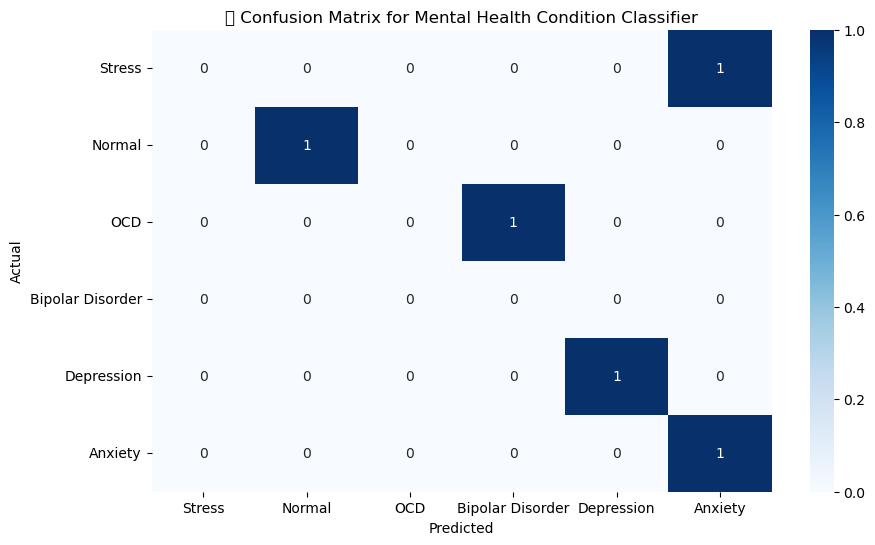

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these with your real data
y_true = ["Depression", "Stress", "Normal", "Anxiety", "OCD"]
y_pred = ["Depression", "Anxiety", "Normal", "Anxiety", "Bipolar Disorder"]

# Print classification report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
labels = list(set(y_true + y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🧠 Confusion Matrix for Mental Health Condition Classifier')
plt.show()
